In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import Imputer, scale
warnings.filterwarnings("ignore")
#from imblearn.under_sampling import InstanceHardnessThreshold

In [2]:
df_am = pd.read_csv("amazon_cells_labelled.txt",sep="\t")
df_am

,tweet,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [3]:
for row,col in df_am['tweet'].iteritems():
    print(row,col)

0 So there is no way for me to plug it in here in the US unless I go by a converter.
1 Good case, Excellent value.
2 Great for the jawbone.
3 Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
4 The mic is great.
5 I have to jiggle the plug to get it to line up right to get decent volume.
6 If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
7 If you are Razr owner...you must have this!
8 Needless to say, I wasted my money.
9 What a waste of money and time!.
10 And the sound quality is great.
11 He was very impressed when going from the original battery to the extended battery.
12 If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.
13 Very good quality though
14 The design is very odd, as the ear "clip" is not very comfortable at all.
15 Highly recommend for any one who has a blue tooth phone.
16 I advise EVERYONE DO NOT BE FOOLED!
17 S

986 You also cannot take pictures with it in the case because the lense is covered.
987 Phone falls out easily.
988 It didn't work, people can not hear me when I talk.
989 The text messaging feature is really tricky to use.
990 I'm really disappointed all I have now is a charger that doesn't work.
991 Painful on the ear.
992 Lasted one day and then blew up.
993 disappointed.
994 Kind of flops around.
995 The screen does get smudged easily because it touches your ear and face.
996 What a piece of junk.. I lose more calls on this phone.
997 Item Does Not Match Picture.
998 The only thing that disappoint me is the infra red port (irda).
999 You can not answer calls with the unit, never worked once!


In [4]:
df_am['rating']

0      0
1      1
2      1
3      0
4      1
5      0
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     0
20     0
21     1
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     0
      ..
970    0
971    1
972    0
973    0
974    0
975    1
976    1
977    1
978    1
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: rating, Length: 1000, dtype: int64

In [5]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy

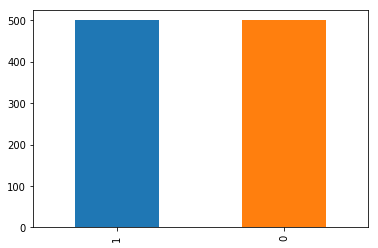

In [6]:
df_am['rating'].value_counts().plot(kind='bar')

In [7]:
from wordcloud import WordCloud,STOPWORDS

In [8]:
df2=df_am[df_am['rating']==0]
words = ' '.join(df2['tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [9]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

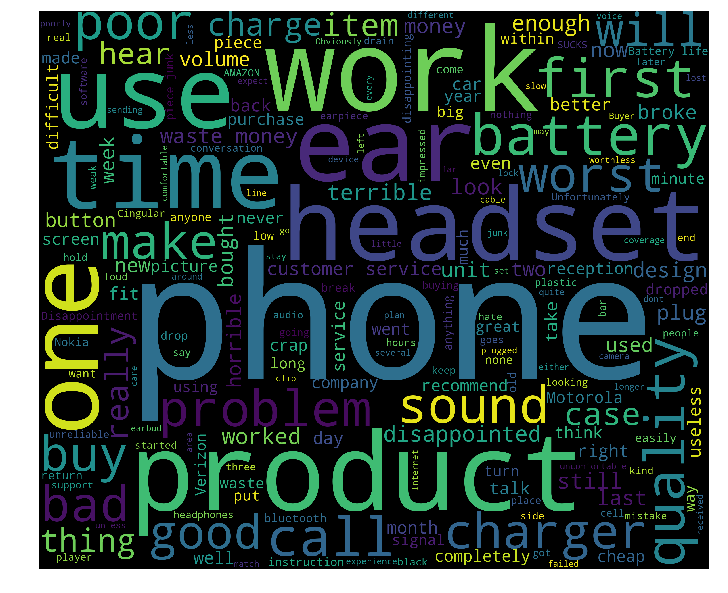

In [10]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [11]:
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [12]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)#replace sngle words in begining of sentence with " "
    words = letters_only.lower().split()#change all to lower case & split
    stops = set(stopwords.words("english"))#removing stopwords
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [13]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [14]:
df_am['clean_tweet'] = df_am['tweet'].apply(lambda x: tweet_to_words(x))
df_am['Tweet_length'] = df_am['tweet'].apply(lambda x: clean_tweet_length(x))
#print(df_am['Tweet_length'])
k=df_am['Tweet_length']
for row,col in k.iteritems():
    print (row,col)

0 6
1 4
2 2
3 7
4 2
5 8
6 10
7 3
8 4
9 3
10 3
11 6
12 11
13 3
14 5
15 6
16 3
17 2
18 2
19 9
20 8
21 6
22 2
23 10
24 4
25 5
26 7
27 4
28 8
29 2
30 6
31 7
32 5
33 6
34 13
35 13
36 2
37 4
38 4
39 2
40 10
41 2
42 4
43 3
44 3
45 2
46 5
47 9
48 4
49 2
50 4
51 5
52 12
53 6
54 2
55 5
56 1
57 9
58 7
59 2
60 5
61 8
62 12
63 3
64 7
65 15
66 5
67 8
68 2
69 4
70 2
71 9
72 2
73 5
74 2
75 2
76 3
77 3
78 5
79 5
80 4
81 2
82 6
83 3
84 6
85 5
86 3
87 3
88 8
89 3
90 11
91 2
92 2
93 6
94 3
95 1
96 4
97 4
98 12
99 2
100 5
101 7
102 2
103 6
104 8
105 11
106 8
107 12
108 13
109 4
110 13
111 5
112 16
113 4
114 2
115 10
116 7
117 2
118 2
119 2
120 14
121 5
122 3
123 2
124 3
125 2
126 3
127 6
128 4
129 3
130 5
131 4
132 7
133 2
134 2
135 5
136 3
137 4
138 7
139 3
140 1
141 8
142 2
143 1
144 7
145 5
146 2
147 2
148 5
149 5
150 1
151 4
152 6
153 13
154 5
155 12
156 5
157 4
158 2
159 2
160 7
161 2
162 4
163 7
164 12
165 2
166 5
167 7
168 2
169 7
170 2
171 3
172 3
173 5
174 8
175 4
176 13
177 10
178 4
179 6
180 2
1

In [15]:
'''y=pd.DataFrame()
z=" "
j=0
i=0
x=df_india['clean_tweet']
space=0
for row,col in x.iteritems():
    space=0
    while (space<=8):
        z=z+x[j][i]
        #print(z)
        i+=1
        if ( x[j][i]==" " ):
            space+=1
    i=0
    y.set_value(j,i,z)
    z=" "
    j+=1
y
'''

'y=pd.DataFrame()\nz=" "\nj=0\ni=0\nx=df_india[\'clean_tweet\']\nspace=0\nfor row,col in x.iteritems():\n    space=0\n    while (space<=8):\n        z=z+x[j][i]\n        #print(z)\n        i+=1\n        if ( x[j][i]==" " ):\n            space+=1\n    i=0\n    y.set_value(j,i,z)\n    z=" "\n    j+=1\ny\n'

In [16]:
#df_india["reduced"]=y

In [17]:
train, test = train_test_split(df_am,test_size=0.25)
#df_imdb['clean_tweet']
print ("train:",train["rating"].value_counts())
print ("test:",test["rating"].value_counts())

print (train['clean_tweet'])

train: 1    381
0    369
Name: rating, dtype: int64
test: 0    131
1    119
Name: rating, dtype: int64
713                                jabra ear gels r best
300                                         sending back
559                                       none works buy
842                         terrible car accept cassette
418                  att clear sound distorted yell talk
337                                        disappointing
196                                            love thin
975                         best charger seen market yet
825                             shipping time also quick
998                 thing disappoint infra red port irda
366                                          waste money
879    seems completely secure holding belt keeping i...
347                                   good audio quality
425    overall psyched phone appointments contacts ge...
916    managed bend leaf spring back place metal enou...
316                               gotten l

In [18]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
#print v.vocabulary_
test_features=v.transform(test_clean_tweet)

In [20]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn import cross_validation

In [21]:
#clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
#clf2 = KNeighborsClassifier(n_neighbors=1) 
#cv = cross_validation.KFold(train_features.shape[0], n_folds=3)
clf1 = RandomForestClassifier(n_estimators=200)
clf2 = AdaBoostClassifier() 
#print (cv)
#print (train_features)


Classifiers = [
    LogisticRegression(solver='liblinear',penalty='l1',max_iter=200),
    #LogisticRegressionCV(solver='liblinear',penalty='l1',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
     BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8),
     BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)]

In [22]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
#results = []
Accuracy=[]
Model=[]
for classifier in Classifiers:
    #for traincv, testcv in cv:
        try:
            #probas = classifier.fit(train[traincv], target[traincv]).predict_proba(train[testcv])
            #results.append( Error_function )

            fit = classifier.fit(train_features,train['rating'])
            pred = fit.predict(test_features)
        except Exception:
            fit = classifier.fit(dense_features,train['rating'])
            pred = fit.predict(dense_test)
        accuracy = accuracy_score(pred,test['rating'])
        Accuracy.append(accuracy)
        Model.append(classifier.__class__.__name__)
        print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    
# "Error_function" can be replaced by the error function of your analysis


Accuracy of LogisticRegressionis 0.752
Accuracy of KNeighborsClassifieris 0.652
Accuracy of SVCis 0.476
Accuracy of DecisionTreeClassifieris 0.748
Accuracy of RandomForestClassifieris 0.752
Accuracy of AdaBoostClassifieris 0.744
Accuracy of GaussianNBis 0.676
Accuracy of BaggingClassifieris 0.708
Accuracy of BaggingClassifieris 0.764


In [23]:
'''from sklearn.model_selection import GridSearchCV
svc = SVC()
c = (10**np.array(range(1,2)))/100
params = {"kernel":["rbf", "poly"], 'C':c}
clf = GridSearchCV(svc, params, cv=None).fit(dense_features, train['rating'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['rating'])
accuracy

#X_train, y_train, X_validation, y_validation, X_test, y_test
'''

'from sklearn.model_selection import GridSearchCV\nsvc = SVC()\nc = (10**np.array(range(1,2)))/100\nparams = {"kernel":["rbf", "poly"], \'C\':c}\nclf = GridSearchCV(svc, params, cv=None).fit(dense_features, train[\'rating\'])\npred = fit.predict(dense_test)\naccuracy = accuracy_score(pred,test[\'rating\'])\naccuracy\n\n#X_train, y_train, X_validation, y_validation, X_test, y_test\n'

In [24]:
dense_features.shape

(750, 1371)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

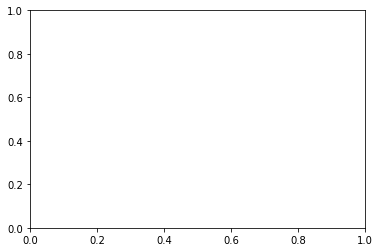

In [25]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')